In [ ]:
# Question 2

In [2]:
from numpy.random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import poisson
import matplotlib.pyplot as plt
import statistics as st
import pandas as pd

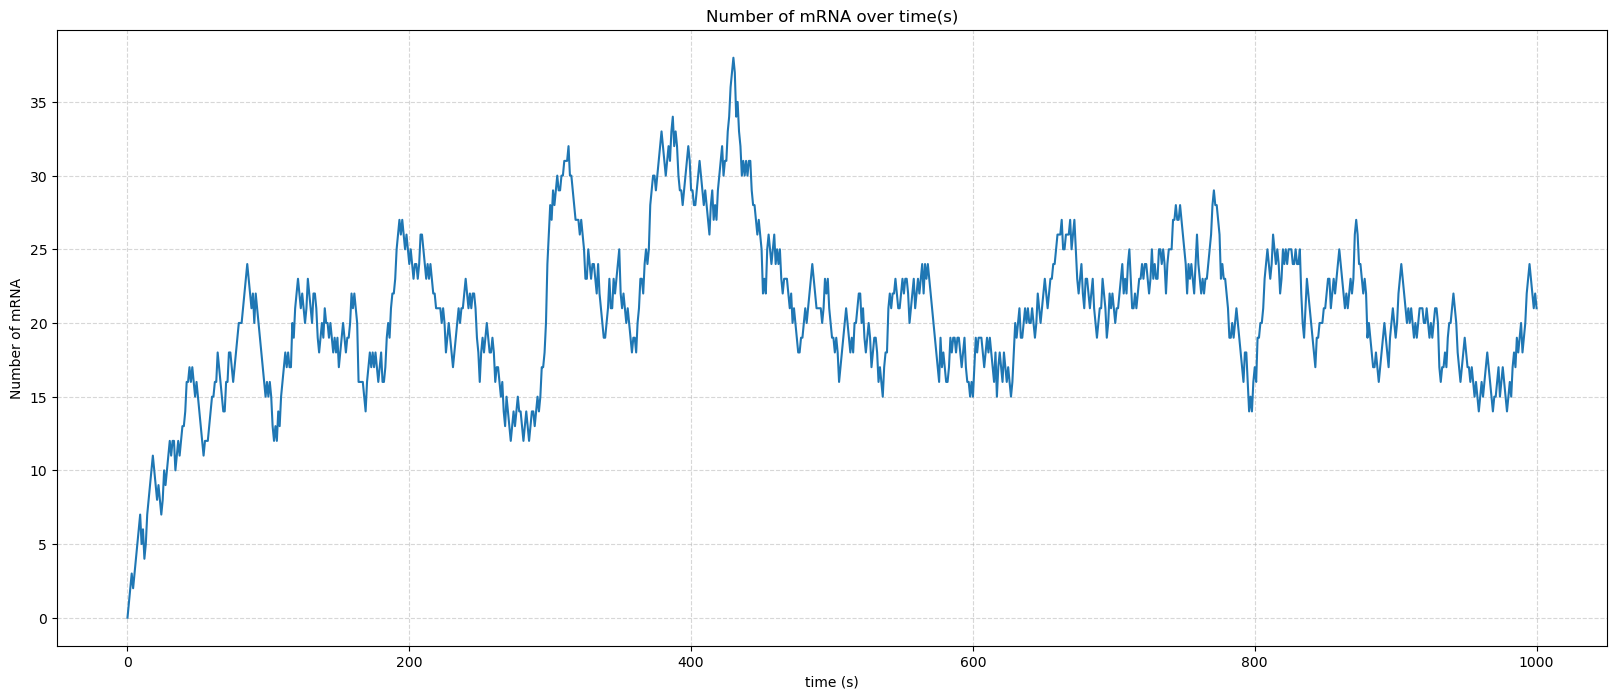

The average value of mRNA is 20.66033966033966
The variance of mRNA is 26.789725758756727
The Fano factor is 1.2966740237181706


In [4]:
#Set the values of the rates
k0 = 0.2
k1 = 0.01
#Set the stoichiometries 

stoichiometry = [1,-1]

#Make a function to calculate the propensities of synthesis (k0) and degradation (k1).

def propensities(x):
    return[k0,k1*x] # Here we assume that cell size = 1. 

# Now let us define a function for the reaction times. We need to make sure that s does not equal to 0 and so we set s 
#to infinity. This is equivalent to an infinitely small number without being 0.

def reaction_times(x):
    a = propensities(x)
    aInv = [1/s if s>0 else np.inf for s in a]
    return -np.log(rand(2)) * aInv
reaction_times(1000)

# We now define the function for each step of the stoichometric simulation

def ssa_step(x,tIn,tOut):
    t = tIn
    while t<tOut:
        rt = reaction_times(x)
        idx = np.argmin(rt)
        tau = np.min(rt)
        x+= stoichiometry[idx]
        t+= tau
    return x
# Now that the function for each step of the stoichiometric model, we define our starting conditions of dt
# (change in time), x (initial mRNA number), and t (initial time). We define mRNA as equal to a vector [x], and 
#time as a vector[t].

dt = 1
x= 0
t = 0.0

mRNA = [x]
time = [t]

# Now we make a for loop that constantly iterates a 1000 times and calculates a probability of mRNA changing.
for i in range(1000):
    x = ssa_step(x,t,t+dt)
    t += dt
    mRNA.append(x)
    time.append(t)
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(time, mRNA, color='tab:blue',label='P(t) rand')
ax.set_xlabel('time (s)')
ax.set_ylabel('Number of mRNA')
plt.title('Number of mRNA over time(s)')
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.show()
#We now calculate our values for mean of the mRNA array, variation in the array and then divide the variation by the 
#mean to obtain our Fano factor

print("The average value of mRNA is", np.mean(mRNA)) #Calculate the mean of mRNA
print("The variance of mRNA is", np.var(mRNA))       #Calculate the variation in mRNA
print("The Fano factor is",np.var(mRNA)/np.mean(mRNA) ) # Calculate the Fano 